# Jet Compression using an Autoencoder

In [1]:
import sys
BIN = '../../'
sys.path.append(BIN)
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset

from my_nn_modules import AE_big, AE_3D_200, get_data, fit

import utils

import my_matplotlib_style as ms
mpl.rc_file(BIN + 'my_matplotlib_rcparams')

In [2]:
force_cpu = False

if force_cpu:
    device = torch.device('cpu')
else:
    if torch.cuda.is_available():
        device = torch.device('cuda')
    else:
        device = torch.device('cpu')
print('Using device:', device)

Using device: cpu


## Loading and preparing the data

In [3]:
# Load data
train_orig = pd.read_pickle(BIN + 'processed_data/train.pkl')
test_orig = pd.read_pickle(BIN + 'processed_data/test.pkl')

#train = pd.read_pickle(BIN + 'processed_data/small_train.pkl')
#test = pd.read_pickle(BIN + 'processed_data/small_test.pkl')

train = pd.read_pickle(BIN + 'processed_data/tiny_train.pkl')
test = pd.read_pickle(BIN + 'processed_data/tiny_test.pkl')

train_unnormed = train
test_unnormed = test

train.head(10)

,pT,eta,phi,E
55,50.054909,-1.489814,-0.013206,117.019569
88,46.437202,-1.171399,-3.110984,82.474747
26,51.205708,2.420021,-2.759298,290.355835
42,45.338120,0.372662,1.565418,48.674774
69,79.860138,0.178015,1.890443,81.982803
15,73.360649,1.381951,-0.206220,155.368118
40,87.749413,1.357386,0.395996,181.987015
96,61.254402,-0.582123,-2.515825,72.140312
9,76.077881,0.353055,2.665683,81.734207
72,56.017967,0.231649,0.557851,57.650276


#### Let's have a look at the means of the original training data and the new dataset.

In [4]:
train.mean()

pT      59.776207
eta     -0.072543
phi      0.384123
E      212.436066
dtype: float32

In [5]:
train_orig.mean()

pT     226.349228
eta     -0.021712
phi      0.008840
E      596.682495
dtype: float32

#### As can be seen above, the means qre quite different. Let's now visualize this using histograms.

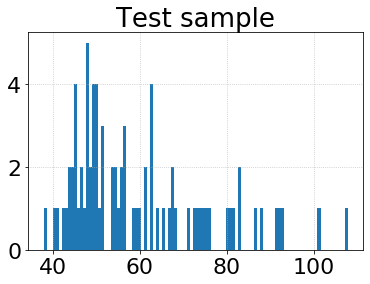

In [6]:
plt.hist(train['pT'], bins=100)
plt.title('Test sample')
plt.savefig('tiny_test_pt_hist')

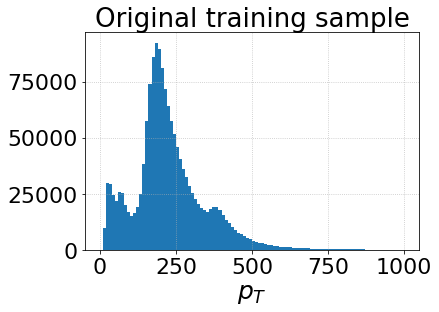

In [7]:
plt.hist(train_orig['pT'], bins=100, range=(0,1000))
plt.title('Original training sample')
plt.xlabel(r'$p_T$')
plt.savefig('original_pt_hist')

In [8]:
# Rename column names
train = train.rename(columns={'jet pT': 'pT', 'jet eta': 'eta', 'jet phi': 'phi', 'jet E': 'E'})

## Normalizing and splitting into train and test datasets

Text(0.5, 0, '$E$')

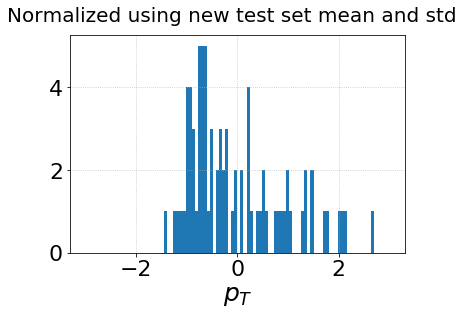

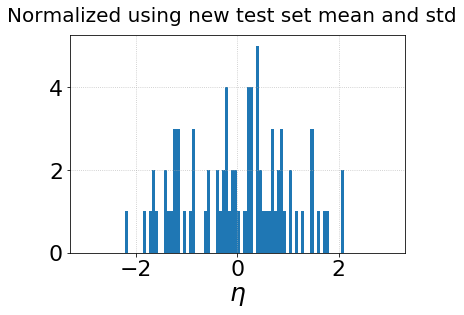

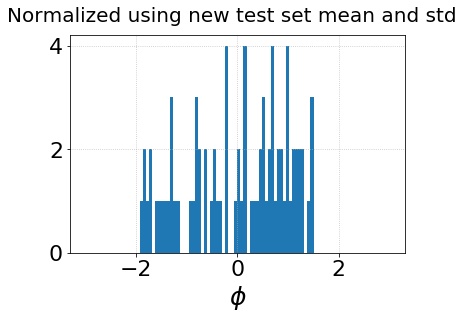

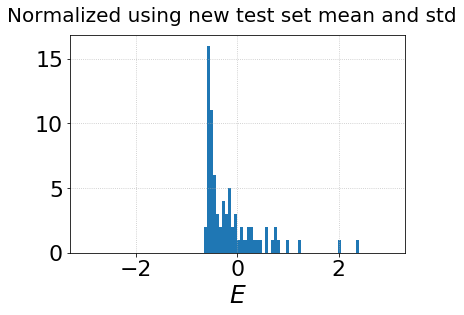

In [9]:
# Load data again jsut to be sure that it's clean whenever this cell is run
train_orig = pd.read_pickle(BIN + 'processed_data/train.pkl')
test_orig = pd.read_pickle(BIN + 'processed_data/test.pkl')

#train = pd.read_pickle(BIN + 'processed_data/small_train.pkl')
#test = pd.read_pickle(BIN + 'processed_data/small_test.pkl')

train = pd.read_pickle(BIN + 'processed_data/tiny_train.pkl')
test = pd.read_pickle(BIN + 'processed_data/tiny_test.pkl')

train_unnormed = train
test_unnormed = test

# Normalize
train_mean = train.mean()
train_std = train.std()

train = (train - train_mean) / train_std
test = (test - train_mean) / train_std

train_x = train
test_x = test
train_y = train_x  # y = x since we are building an AE
test_y = test_x

train_ds = TensorDataset(torch.tensor(train_x.values), torch.tensor(train_y.values))
valid_ds = TensorDataset(torch.tensor(test_x.values), torch.tensor(test_y.values))

plt.hist(train['pT'], bins=100, range=(-3, 3))
plt.suptitle('Normalized using new test set mean and std', fontsize=20)
plt.xlabel(r'$p_T$')
plt.figure()
plt.hist(train['eta'], bins=100, range=(-3, 3))
plt.suptitle('Normalized using new test set mean and std', fontsize=20)
plt.xlabel(r'$\eta$')
plt.figure()
plt.hist(train['phi'], bins=100, range=(-3, 3))
plt.suptitle('Normalized using new test set mean and std', fontsize=20)
plt.xlabel(r'$\phi$')
plt.figure()
plt.hist(train['E'], bins=100, range=(-3, 3))
plt.suptitle('Normalized using new test set mean and std', fontsize=20)
plt.xlabel(r'$E$')

Text(0.5, 0, '$E$')

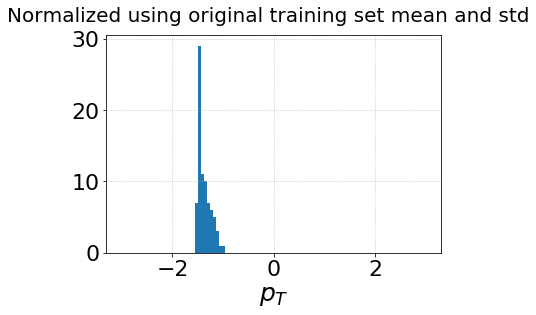

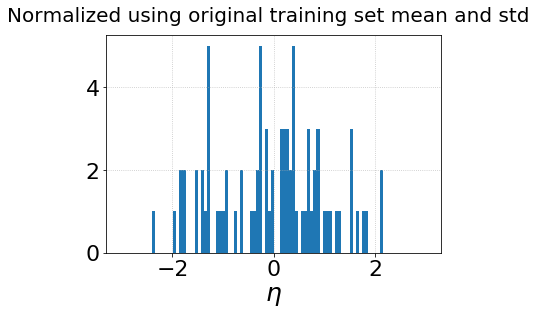

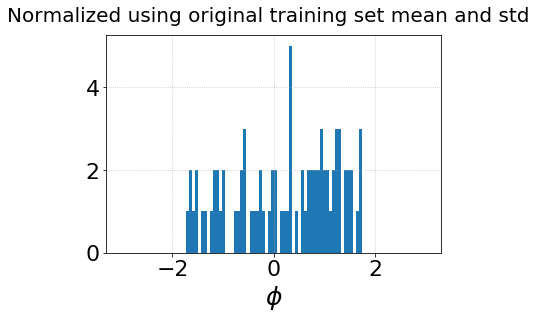

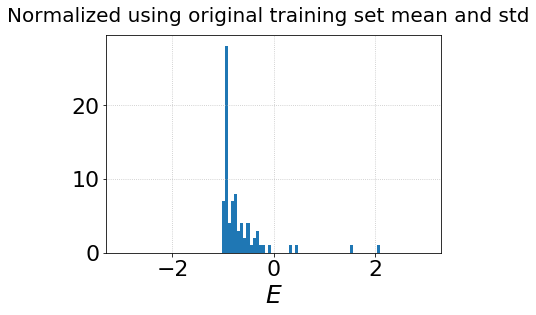

In [10]:
# Load data again jsut to be sure that it's clean whenever this cell is run
train_orig = pd.read_pickle(BIN + 'processed_data/train.pkl')
test_orig = pd.read_pickle(BIN + 'processed_data/test.pkl')

#train = pd.read_pickle(BIN + 'processed_data/small_train.pkl')
#test = pd.read_pickle(BIN + 'processed_data/small_test.pkl')

train = pd.read_pickle(BIN + 'processed_data/tiny_train.pkl')
test = pd.read_pickle(BIN + 'processed_data/tiny_test.pkl')

train_unnormed = train
test_unnormed = test

# Normalize
train_mean = train_orig.mean()
train_std = train_orig.std()

train = (train - train_mean) / train_std
test = (test - train_mean) / train_std

train_x = train
test_x = test
train_y = train_x  # y = x since we are building an AE
test_y = test_x

train_ds = TensorDataset(torch.tensor(train_x.values), torch.tensor(train_y.values))
valid_ds = TensorDataset(torch.tensor(test_x.values), torch.tensor(test_y.values))

plt.hist(train['pT'], bins=100, range=(-3, 3))
plt.suptitle('Normalized using original training set mean and std', fontsize=20)
plt.xlabel(r'$p_T$')
plt.figure()
plt.hist(train['eta'], bins=100, range=(-3, 3))
plt.suptitle('Normalized using original training set mean and std', fontsize=20)
plt.xlabel(r'$\eta$')
plt.figure()
plt.hist(train['phi'], bins=100, range=(-3, 3))
plt.suptitle('Normalized using original training set mean and std', fontsize=20)
plt.xlabel(r'$\phi$')
plt.figure()
plt.hist(train['E'], bins=100, range=(-3, 3))
plt.suptitle('Normalized using original training set mean and std', fontsize=20)
plt.xlabel(r'$E$')

## Evaluation

In [11]:
save_path = './models/AE_3D_v2_bs256_loss28eneg7.pt'
model = AE_3D_200()
#save_path = './models/AE_3D_bs256_loss49eneg7.pt'
#model = AE_3D()
#save_path = './models/AE_big_model_loss48eneg6.pt'
#model = AE_big()
model.load_state_dict(torch.load(save_path))
model.eval()

AE_3D_200(
  (en1): Linear(in_features=4, out_features=200, bias=True)
  (en2): Linear(in_features=200, out_features=100, bias=True)
  (en3): Linear(in_features=100, out_features=50, bias=True)
  (en4): Linear(in_features=50, out_features=3, bias=True)
  (de1): Linear(in_features=3, out_features=50, bias=True)
  (de2): Linear(in_features=50, out_features=100, bias=True)
  (de3): Linear(in_features=100, out_features=200, bias=True)
  (de4): Linear(in_features=200, out_features=4, bias=True)
  (tanh): Tanh()
)

In [12]:
plt.close('all')
unit_list = ['[GeV]', '[rad]', '[rad]', '[GeV]']
variable_list = [r'$p_T$', r'$\eta$', r'$\phi$', r'$E$']
line_style = ['--', '-']
colors = ['orange', 'c']
markers = ['*', 's']

Normed loss: 1.269484e-06


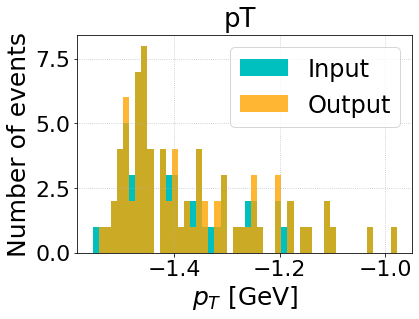

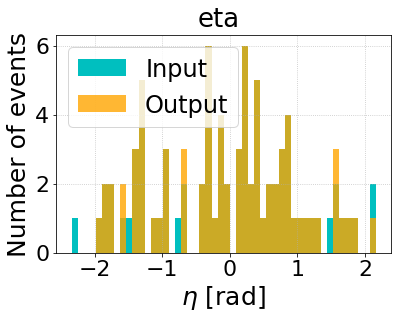

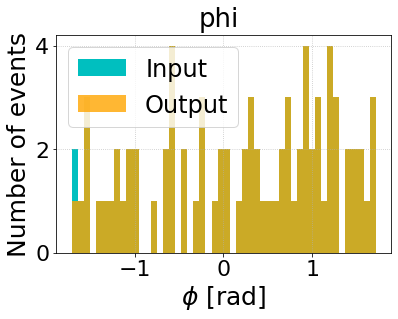

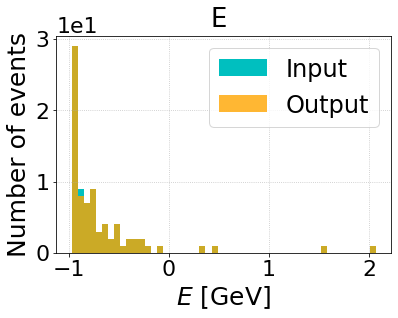

In [20]:
pred, data = utils.normalized_reconstructions(model, unnormed_df=train_unnormed, force_mean=train_orig.mean(), force_std=train_orig.std())
loss_func = nn.MSELoss()
normed_loss = loss_func(input=data, target=pred)
print('Normed loss: %e' % normed_loss)

utils.plot_histograms(pred, data, bins=50)

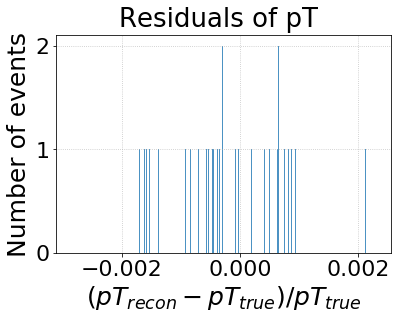

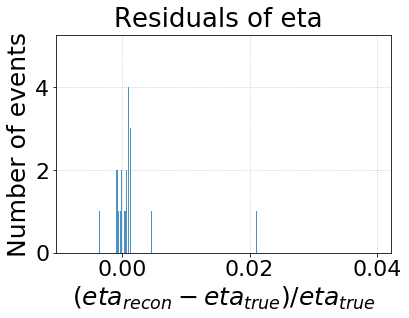

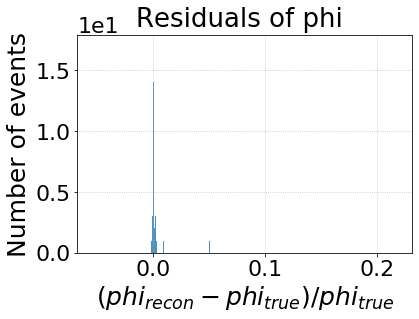

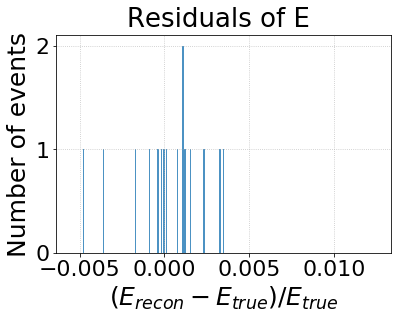

In [21]:
utils.plot_residuals(pred, data)

Normed loss: 2.870508e-02


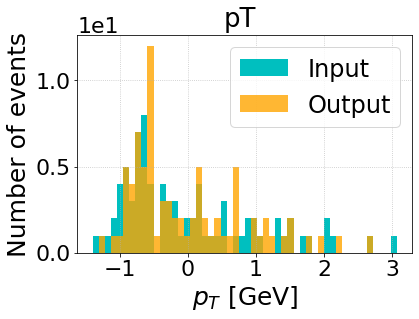

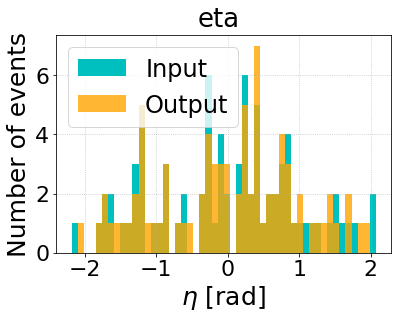

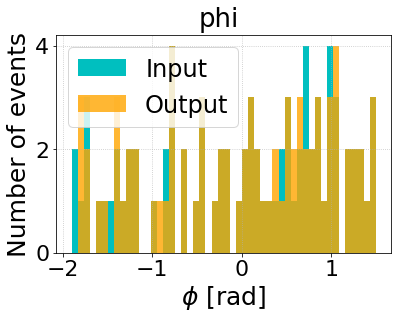

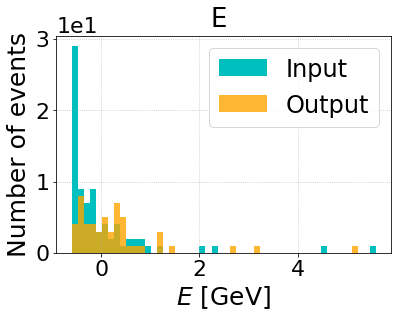

In [16]:
pred, data = utils.normalized_reconstructions(model, unnormed_df=train_unnormed)
loss_func = nn.MSELoss()
normed_loss = loss_func(input=data, target=pred)
print('Normed loss: %e' % normed_loss)

utils.plot_histograms(pred, data, bins=50)

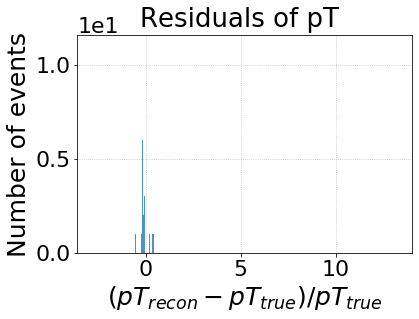

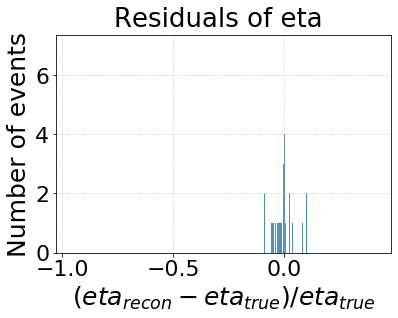

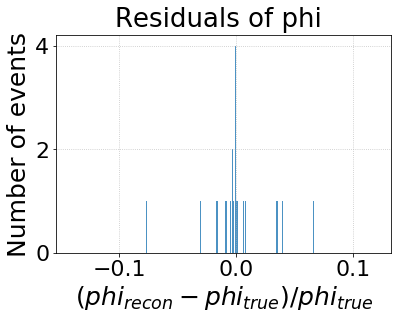

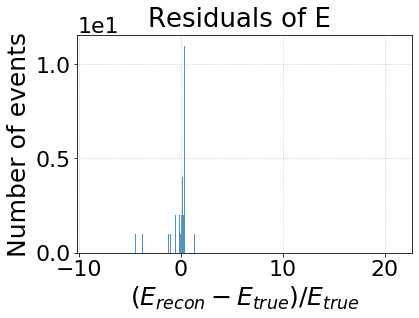

In [19]:
utils.plot_residuals(pred, data)

### Reconstruct using original training set mean and std

Unnormed loss: 0.161733


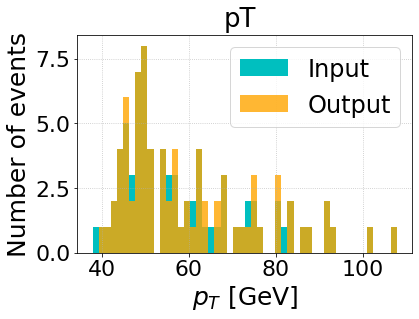

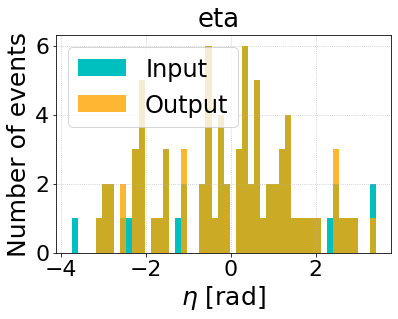

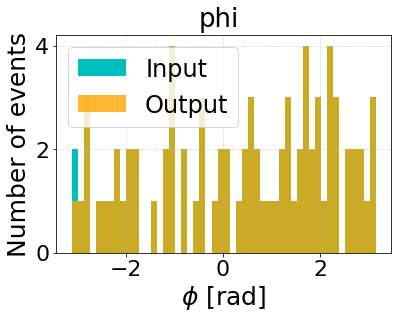

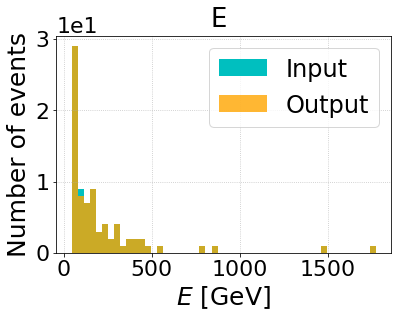

In [17]:
pred, data = utils.unnormalized_reconstructions(model, unnormed_df=train_unnormed, force_mean=train_orig.mean(), force_std=train_orig.std())
loss_func = nn.MSELoss()
unnormed_loss = loss_func(input=data, target=pred)
print('Unnormed loss: %f' % unnormed_loss)

alph = 0.8
n_bins = 50
for kk in np.arange(4):
    plt.figure()
    n_hist_data, bin_edges, _ = plt.hist(data[:, kk], color=colors[1], label='Input', alpha=1, bins=n_bins)
    n_hist_pred, _, _ = plt.hist(pred[:, kk], color=colors[0], label='Output', alpha=alph, bins=bin_edges)
    plt.suptitle(train.columns[kk])
    plt.xlabel(variable_list[kk] + ' ' + unit_list[kk])
    plt.ylabel('Number of events')
    ms.sciy()
    plt.legend()

### Reconstruct using current test set mean and std

Unnormed loss: 1532.921753


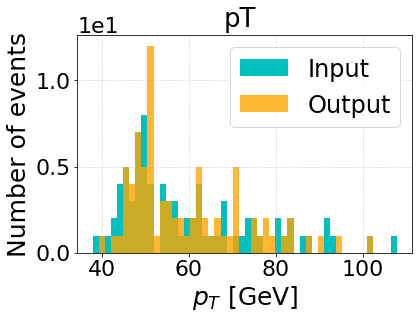

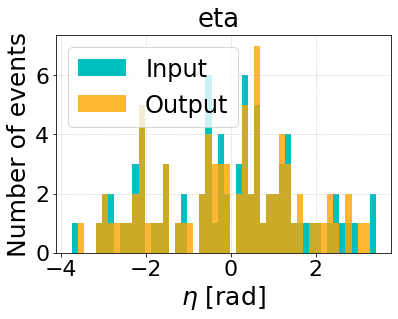

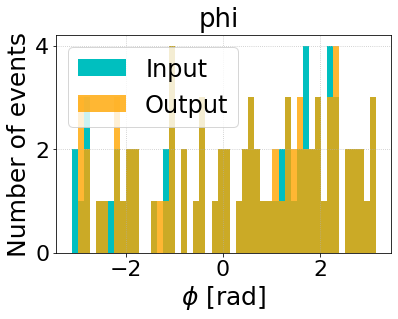

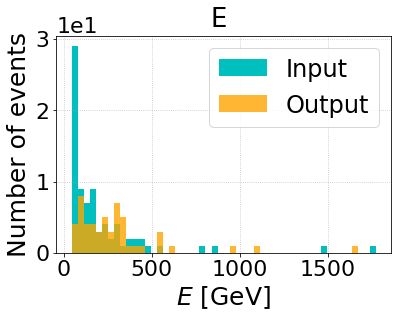

In [18]:
pred, data = utils.unnormalized_reconstructions(model, unnormed_df=train_unnormed)
loss_func = nn.MSELoss()
unnormed_loss = loss_func(input=data, target=pred)
print('Unnormed loss: %f' % unnormed_loss)

alph = 0.8
n_bins = 50
for kk in np.arange(4):
    plt.figure()
    n_hist_data, bin_edges, _ = plt.hist(data[:, kk], color=colors[1], label='Input', alpha=1, bins=n_bins)
    n_hist_pred, _, _ = plt.hist(pred[:, kk], color=colors[0], label='Output', alpha=alph, bins=bin_edges)
    plt.suptitle(train.columns[kk])
    plt.xlabel(variable_list[kk] + ' ' + unit_list[kk])
    plt.ylabel('Number of events')
    ms.sciy()
    plt.legend()

### Above we saw that using the original training to do the normalization and unnormalization results in much better reconstruction. This is not always the case, especially when the datasets are very different from each pther.

### Now plot input on top of output using original training mean and std for normalization

Unnormed loss: 0.161733


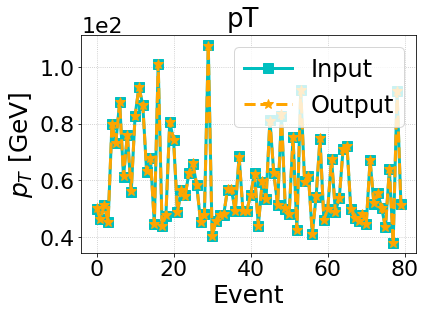

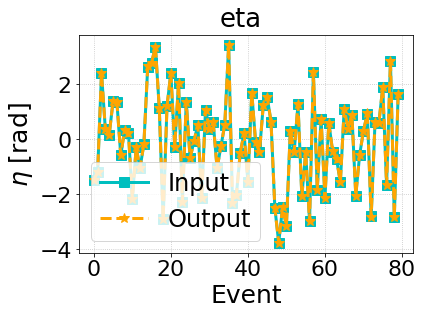

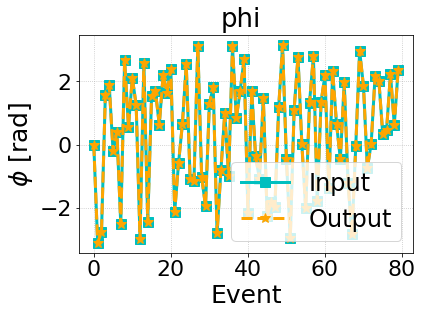

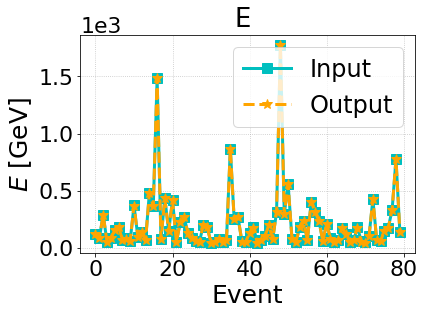

In [67]:
# Plot input on top of output
pred, data = utils.unnormalized_reconstructions(model, unnormed_df=train_unnormed, force_mean=train_orig.mean(), force_std=train_orig.std())
loss_func = nn.MSELoss()
unnormed_loss = loss_func(input=data, target=pred)
print('Unnormed loss: %f' % unnormed_loss)

for kk in np.arange(4):
    plt.figure(kk)
    plt.plot(data[:, kk], color=colors[1], label='Input', linestyle=line_style[1], marker=markers[1])
    plt.plot(pred[:, kk], color=colors[0], label='Output', linestyle=line_style[0], marker=markers[0])
    plt.suptitle(train.columns[kk])
    plt.xlabel('Event')
    plt.ylabel(variable_list[kk] + ' ' + unit_list[kk])
    plt.legend()
    ms.sciy()

In [43]:
# Plot latent space
data = torch.tensor(train_x.values)
latent = model.encode(data).detach().numpy()

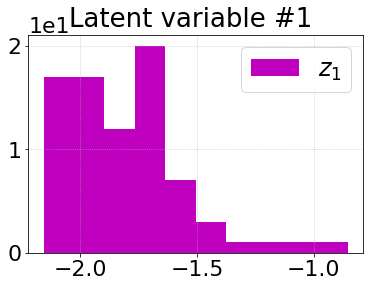

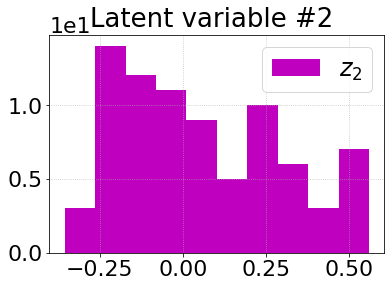

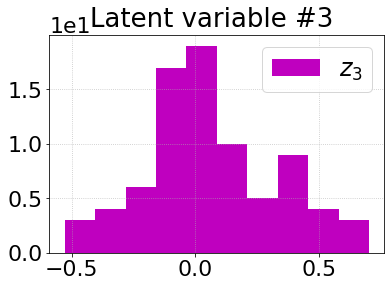

In [34]:
for ii in np.arange(latent.shape[1]):
    plt.figure()
    plt.hist(latent[:, ii], label='$z_%d$' % (ii + 1), color='m')
    plt.suptitle('Latent variable #%d' % (ii + 1))
    plt.legend()
    ms.sciy()

Text(0.5, 0, '$z_3$')

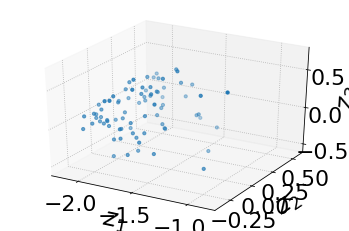

In [35]:
from mpl_toolkits.mplot3d import Axes3D

data = torch.tensor(train_x.values)
latent = model.encode(data).detach().numpy()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(latent[:, 0], latent[:, 1], latent[:, 2], s=10)
ax.set_xlabel(r'$z_1$')
ax.set_ylabel(r'$z_2$')
ax.set_zlabel(r'$z_3$')

Text(0, 0.5, '$z_3$')

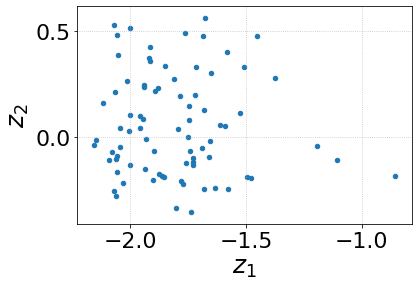

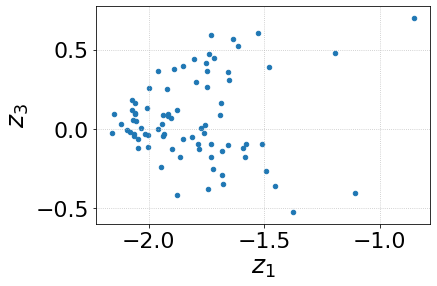

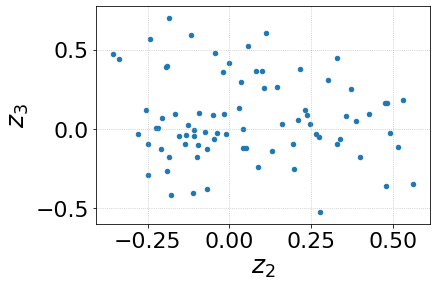

In [36]:
mksz = 20

plt.figure()
plt.scatter(latent[:, 0], latent[:, 1], s=mksz)
plt.xlabel(r'$z_1$')
plt.ylabel(r'$z_2$')

plt.figure()
plt.scatter(latent[:, 0], latent[:, 2], s=mksz)
plt.xlabel(r'$z_1$')
plt.ylabel(r'$z_3$')

plt.figure()
plt.scatter(latent[:, 1], latent[:, 2], s=mksz)
plt.xlabel(r'$z_2$')
plt.ylabel(r'$z_3$')